In [2]:
entrada = "hoy es de dia y manana llueve"
tokens = entrada.lower().split()
tokens
from enum import Enum

class TipoToken(Enum):
    O = 1
    Y = 2
    S = 3
    N = 4
    E = 5
    P = 6
    F = 7

def analizador_lexico(entrada: str) -> list:
    tokens = entrada.lower().split()
    lexemas = []
    atomo_actual = []
    atomos = []  

    for token in tokens:
        if token in ['o', 'y', 'si', 'entonces', 'no']:
            if atomo_actual:
                atomo = ' '.join(atomo_actual)
                lexemas.append({"valor": atomo, "tipo": TipoToken.P})
                atomos.append(atomo)  
                atomo_actual = []
            if token == 'o':
                lexemas.append({"valor": token, "tipo": TipoToken.O})
            elif token == 'y':
                lexemas.append({"valor": token, "tipo": TipoToken.Y})
            elif token == 'si':
                lexemas.append({"valor": token, "tipo": TipoToken.S})
            elif token == 'entonces':
                lexemas.append({"valor": token, "tipo": TipoToken.E})
            elif token == 'no':
                lexemas.append({"valor": token, "tipo": TipoToken.N})
        else:
            atomo_actual.append(token)
    
    if atomo_actual:
        atomo = ' '.join(atomo_actual)
        lexemas.append({"valor": atomo, "tipo": TipoToken.P})
        atomos.append(atomo)  

    lexemas.append({"valor": "end", "tipo": TipoToken.F})
    return lexemas, atomos

result, atomos = analizador_lexico(entrada)
print(result)
print(atomos)  

class EstadosAnalizador(Enum):
    INICIO = 1
    PRECEDENTE = 2
    ERROR1 = 3
    NEGACION = 4
    CONSECUENTE = 5
    ATOMO = 6
    DISYUNCION = 7
    CONJUNCION = 8
    ERROR2 = 9
    FIN = 10

def analizador_sintactico(lexemas: list):
    EstadoActual = EstadosAnalizador.INICIO
    for lexema in lexemas:
        if EstadoActual == EstadosAnalizador.INICIO:
            if lexema['tipo'] == TipoToken.S:
                EstadoActual = EstadosAnalizador.PRECEDENTE
            elif lexema['tipo'] == TipoToken.N:
                EstadoActual = EstadosAnalizador.NEGACION
            elif lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
            else:
                EstadoActual = EstadosAnalizador.ERROR1
        elif EstadoActual == EstadosAnalizador.PRECEDENTE:
            if lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
            elif lexema['tipo'] == TipoToken.N:
                EstadoActual = EstadosAnalizador.NEGACION
            else:
                EstadoActual = EstadosAnalizador.ERROR1
        elif EstadoActual == EstadosAnalizador.NEGACION:
            if lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
            else:
                EstadoActual = EstadosAnalizador.ERROR2
        elif EstadoActual == EstadosAnalizador.CONSECUENTE:
            if lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
            elif lexema['tipo'] == TipoToken.N:
                EstadoActual = EstadosAnalizador.NEGACION
            else:
                EstadoActual = EstadosAnalizador.ERROR2
        elif EstadoActual == EstadosAnalizador.ATOMO:
            if lexema['tipo'] == TipoToken.E:
                EstadoActual = EstadosAnalizador.CONSECUENTE
            elif lexema['tipo'] == TipoToken.Y:
                EstadoActual = EstadosAnalizador.CONJUNCION
            elif lexema['tipo'] == TipoToken.O:
                EstadoActual = EstadosAnalizador.DISYUNCION
            elif lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
            elif lexema['tipo'] == TipoToken.F:
                EstadoActual = EstadosAnalizador.FIN
            else:
                EstadoActual = EstadosAnalizador.ERROR2
        elif EstadoActual == EstadosAnalizador.CONJUNCION:
            if lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
            elif lexema['tipo'] == TipoToken.N:
                EstadoActual = EstadosAnalizador.NEGACION
            else:
                EstadoActual = EstadosAnalizador.ERROR2
        elif EstadoActual == EstadosAnalizador.DISYUNCION:
            if lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
            elif lexema['tipo'] == TipoToken.N:
                EstadoActual = EstadosAnalizador.NEGACION
            else:
                EstadoActual = EstadosAnalizador.ERROR2
        elif EstadoActual == EstadosAnalizador.ERROR1:
            break
        elif EstadoActual == EstadosAnalizador.ERROR2:
            break
        elif EstadoActual == EstadosAnalizador.FIN:
            break
    return EstadoActual


estado_final = analizador_sintactico(result)
print(estado_final)


[{'valor': 'hoy es de dia', 'tipo': <TipoToken.P: 6>}, {'valor': 'y', 'tipo': <TipoToken.Y: 2>}, {'valor': 'manana llueve', 'tipo': <TipoToken.P: 6>}, {'valor': 'end', 'tipo': <TipoToken.F: 7>}]
['hoy es de dia', 'manana llueve']
EstadosAnalizador.FIN


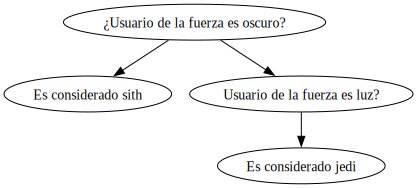

In [3]:
import graphviz
from IPython.display import display

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree:
    def __init__(self):
        self.root = None
        self.node_dict = {}  # Diccionario para almacenar los nodos por valor

    def add_node(self, value, left=None, right=None):
        """Agrega un nuevo nodo al árbol"""
        if value not in self.node_dict:
            self.node_dict[value] = Node(value)
        node = self.node_dict[value]

        if self.root is None:
            self.root = node

        if left:
            if left not in self.node_dict:
                self.node_dict[left] = Node(left)
            node.left = self.node_dict[left]

        if right:
            if right not in self.node_dict:
                self.node_dict[right] = Node(right)
            node.right = self.node_dict[right]

    def bfs(self):
        """Recorre el árbol en anchura"""
        if self.root is None:
            return []

        result = []
        queue = [self.root]
        while queue:
            node = queue.pop(0)
            result.append(node)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

        return result

    def dfs(self):
        """Recorre el árbol en profundidad"""
        if self.root is None:
            return []

        def dfs_recursive(node, result):
            if node:
                result.append(node)
                dfs_recursive(node.left, result)
                dfs_recursive(node.right, result)

        result = []
        dfs_recursive(self.root, result)
        return result

def build_tree():
    tree = BinaryTree()

    # Definir las reglas y construir el árbol
    tree.add_node('¿Usuario de la fuerza es oscuro?', 'Es considerado sith', 'Usuario de la fuerza es luminoso?')
    tree.add_node('Usuario de la fuerza es luminoso?', 'Es considerado jedi', None)
    
    tree.add_node('Usuario de la fuerza tiene al menos 5 años de servicio?', 'Es maestro', 'Usuario de la fuerza tiene menos de 3 años de servicio?')
    tree.add_node('Usuario de la fuerza tiene menos de 3 años de servicio?', 'Es prospecto', 'Usuario de la fuerza tiene menos de 50 misiones?')
    tree.add_node('Usuario de la fuerza tiene menos de 50 misiones?', 'Es aprendiz', 'Usuario de la fuerza tiene entre 50 y 100 misiones?')
    tree.add_node('Usuario de la fuerza tiene entre 50 y 100 misiones?', 'Es discipulo', 'Usuario de la fuerza tiene más de 100 misiones?')
    tree.add_node('Usuario de la fuerza tiene más de 100 misiones?', 'Es maestro', None)
    
    tree.add_node('Usuario de la fuerza es poderoso?', '¿Tiene más de 500 midiclorianos?', '¿Tiene menos de 500 midiclorianos?')
    tree.add_node('¿Tiene más de 500 midiclorianos?', 'Es poderoso', None)
    tree.add_node('¿Tiene menos de 500 midiclorianos?', 'Es debil', None)
    
    tree.add_node('Usuario de la fuerza es sabio?', '¿Tiene más de 1000 aportaciones?', None)
    tree.add_node('¿Tiene más de 1000 aportaciones?', 'Es sabio', None)

    return tree

def visualize_tree(tree, filename=None):
    dot = graphviz.Digraph(format='png')

    def traverse(node, parent=None):
        dot.node(str(id(node)), node.value)
        if parent is not None:
            dot.edge(str(id(parent)), str(id(node)))
        if node.left:
            traverse(node.left, node)
        if node.right:
            traverse(node.right, node)

    traverse(tree.root)
    if filename:
        dot.render(filename, format='png')
    display(dot)

# Crear y visualizar el árbol
tree = build_tree()
visualize_tree(tree, 'tree.png')